## Hand Calculation of Precision / Recall / F1 Score

In [37]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report,confusion_matrix
from matplotlib import pyplot as plot
import pandas as panda
import itertools

In [2]:
## taking an example of class 0 - 100 instances, class 1 - 20 instances, class 2 - 5 instances

class_zero = np.zeros((100,))
class_one = np.ones((20,))
class_two = np.random.randint(2,3,(5,))

y_test = np.concatenate((class_zero,class_one,class_two), axis = 0)

y_test.shape,np.unique(y_test).astype(np.int64),np.bincount(y_test.astype(np.int64))

((125,), array([0, 1, 2], dtype=int64), array([100,  20,   5], dtype=int64))

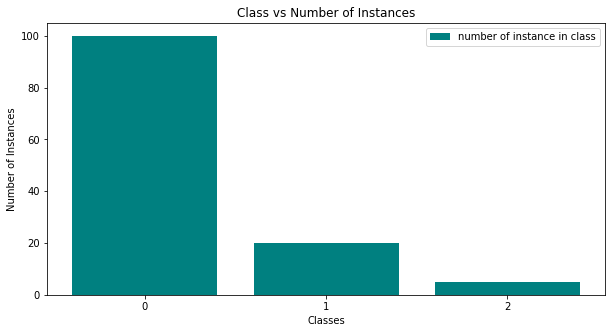

In [3]:

plot.figure(figsize = (10,5))
plot.bar(x= [0,1,2], height = np.bincount(y_test.astype(np.int64)),\
                 label = 'number of instance in class', color = 'teal')
plot.xlabel('Classes')
plot.ylabel('Number of Instances')
plot.title('Class vs Number of Instances')
plot.xticks([0,1,2])
plot.legend(loc='best')
plot.show()

In [4]:
## creating random predictions class 0 - 80 instances, class 1 - 28 instances, class 2 - 17 instances

class_zero = np.zeros((110,))
class_one = np.ones((12,))
class_two = np.random.randint(2,3,(3,))

y_predictions = np.concatenate((class_zero,class_one,class_two), axis = 0)

y_predictions.shape,np.unique(y_predictions).astype(np.int64),np.bincount(y_predictions.astype(np.int64))

((125,), array([0, 1, 2], dtype=int64), array([110,  12,   3], dtype=int64))

In [10]:
classification_report_manual = panda.crosstab(

                            panda.Series(y_test.astype(np.int64),name = 'Actual'),
                            panda.Series(y_predictions.astype(np.int64),name ='Prediction'),
                            margins = True
)

In [11]:
classification_report_manual

Prediction,0,1,2,All
Actual,,,,
0,100,0,0,100
1,10,10,0,20
2,0,2,3,5
All,110,12,3,125


#### False Negative : Classification is actually true  but model detected it as false. Eg second row, 10 samples are actually class 0 , but model detected it as class 1. so for class 1, 10 is false negative

#### False Positive :  Classification is actually false  but model detected it as true. Eg first column, second row. 10 samples are detected as class 0, whereas they dont. hence for class 0, false positive is 10

#### True Negative : Classification is actually false  and model detected it as false. No such example here

#### True Positive :  Classification is actually true and model detected it as true. Eg first column, first row. 100 samples are detected as class 0, and they really belong to class 0. hence for class 0, true positive is 100

<br><br>



##### How do we read the above table

1. out of 100 class 0 , 100 were truly identified. So 100 true positive
2. out of 20 class 1, 10 were truly identified as 1 and 10 were misclassified. So 10 true positive, 10 false positive
3. out of 5 class 2, 3 were truly identified as 2 and 2 were misclassified. So 3 true positive, 2 are false positive

#### lets calculate accuracy score.
remember , accuracy score = true positive + true negative / (true positive+false negative + true negative + false negative)

In [7]:
## from classification report above

true_positive = 80 + 8 + 5 
true_negative = 0
false_positive = 20 + 12
false_negative = 0

acc = (true_positive + true_negative) / (true_positive + true_negative + false_positive+ false_negative)
acc,accuracy_score(y_test,y_predictions)

(0.744, 0.904)

In [21]:
true_positive_class_zero = 100
false_positive_class_zero = 10
false_negative_class_zero = 0



true_positive_class_one = 10
false_positive_class_one = 2
false_negative_class_one = 10



true_positive_class_two = 3
false_positive_class_two = 0
false_negative_class_two  = 2


In [23]:
precision_class_zero = true_positive_class_zero / (true_positive_class_zero + false_positive_class_zero)
precision_class_one = true_positive_class_one / (true_positive_class_one + false_positive_class_one)
precision_class_two = true_positive_class_two/ (true_positive_class_two + false_positive_class_two)

precision_class_zero,precision_class_one, precision_class_two

(0.9090909090909091, 0.8333333333333334, 1.0)

In [24]:
recall_class_zero = true_positive_class_zero / (true_positive_class_zero + false_negative_class_zero)
recall_class_one = true_positive_class_one / (true_positive_class_one + false_negative_class_one)
recall_class_two = true_positive_class_two/ (true_positive_class_two + false_negative_class_two)

recall_class_zero,recall_class_one, recall_class_two

(1.0, 0.5, 0.6)

In [28]:
panda.DataFrame(classification_report(y_test, y_predictions, output_dict = True))

,0.0,1.0,2.0,micro avg,macro avg,weighted avg
f1-score,0.952381,0.625000,0.75,0.904,0.775794,0.891905
precision,0.909091,0.833333,1.00,0.904,0.914141,0.900606
recall,1.000000,0.500000,0.60,0.904,0.700000,0.904000
support,100.000000,20.000000,5.00,125.000,125.000000,125.000000


In [25]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       100
         1.0       0.83      0.50      0.62        20
         2.0       1.00      0.60      0.75         5

   micro avg       0.90      0.90      0.90       125
   macro avg       0.91      0.70      0.78       125
weighted avg       0.90      0.90      0.89       125



In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plot.imshow(cm, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.colorbar()
    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plot.ylabel('True label')
    plot.xlabel('Predicted label')
#     plot.tight_layout()
    plot.show()

In [42]:
cm  = confusion_matrix(y_test, y_predictions)
cm

array([[100,   0,   0],
       [ 10,  10,   0],
       [  0,   2,   3]], dtype=int64)

Confusion matrix, without normalization


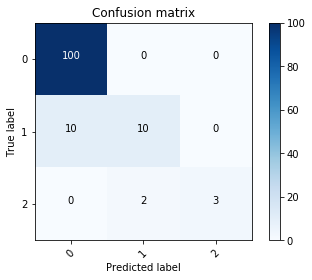

In [43]:
plot_confusion_matrix(cm, np.unique(y_test).astype(np.int64),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plot.cm.Blues)

In [44]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)
y_test_lbl = lb.transform(y_test)
y_test_lbl

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,